<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/Matrix_Profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matrix Profile


## Introduction

The matrix profile (MP) is a data structure and associated algorithms that helps solve the dual problem of anomaly detection and motif discovery. It is robust, scalable and largely parameter-free.

MP can be combined with other algorithms to accomplish:

* Motif discovery
* Time series chains
* Anomaly discovery
* Joins
* Semantic segmentation

matrixprofile-ts offers 3 different algorithms to compute Matrix Profile:
* STAMP (Scalable Time Series Anytime Matrix Profile) - Each distance profile is independent of other distance profiles, the order in which they are computed can be random. It is an anytime algorithm.
* STOMP (Scalable Time Series Ordered Matrix Profile) - This algorithm is an exact ordered algorithm. It is significantly faster than STAMP.
* SCRIMP++ (Scalable Column Independent Matrix Profile) - This algorithm combines the anytime component of STAMP with the speed of STOMP.


## Code Example


In [1]:
!pip install matrixprofile-ts

In [3]:
import pandas as pd
## example data importing
data = pd.read_csv('https://raw.githubusercontent.com/iotanalytics/IoTTutorial/main/data/SCG_data.csv').drop('Unnamed: 0',1).to_numpy()[0:20,:1000]

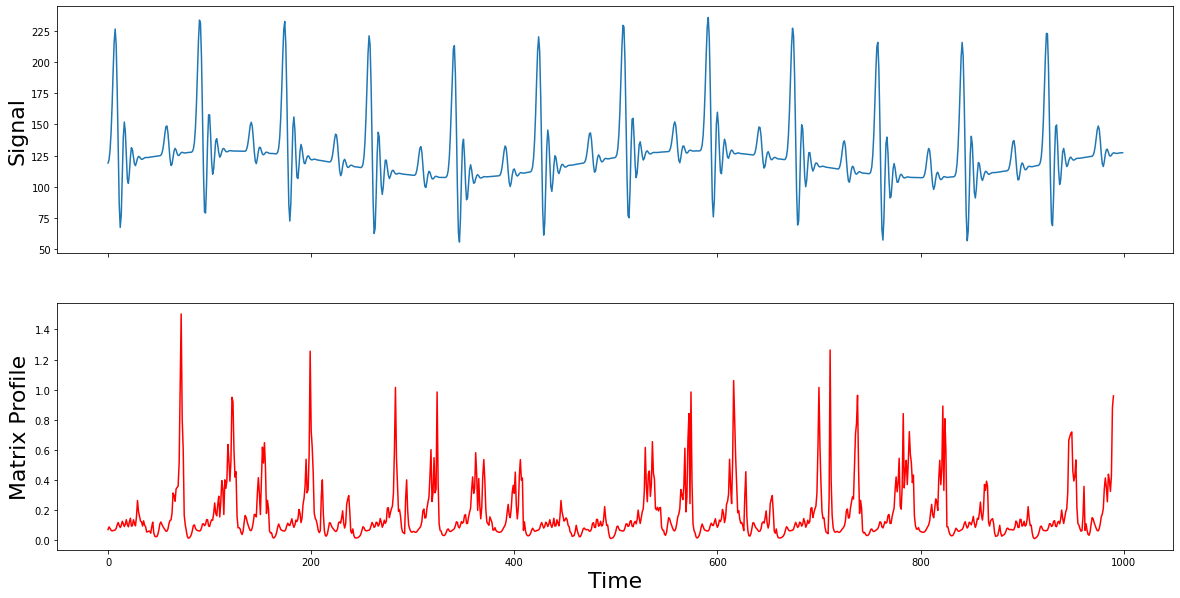

In [16]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from matrixprofile import *

import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Pull a portion of the data
pattern = data[10,:] + max(abs(data[10,:]))

# Compute Matrix Profile
m = 10
mp = matrixProfile.stomp(pattern,m)

#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern)
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Time', size=22);

## Discussion


Pros:
* It is exact: For motif discovery, discord discovery, time series joins etc., the Matrix Profile based methods provide no false positives or false dismissals.
* It is simple and parameter-free: In contrast, the more general algorithms in this space
that typically require building and tuning spatial access methods and/or hash functions.
* It is space efficient: Matrix Profile construction algorithms requires an inconsequential
space overhead, just linear in the time series length with a small constant factor, allowing
massive datasets to be processed in main memory (for most data mining, disk is death).
* It allows anytime algorithms: While exact MP algorithms are extremely scalable, for
extremely large datasets we can compute the Matrix Profile in an anytime fashion, allowing
ultra-fast approximate solutions and real-time data interaction.
* It is incrementally maintainable: Having computed the Matrix Profile for a dataset,
we can incrementally update it very efficiently. In many domains this means we can effectively
maintain exact joins, motifs, discords on streaming data forever.
* It can leverage hardware: Matrix Profile construction is embarrassingly parallelizable,
both on multicore processors, GPUs, distributed systems etc.
* It is free of the curse of dimensionality: That is to say, It has time complexity that is
constant in subsequence length: This is a very unusual and desirable property; virtually all
existing algorithms in the time series scale poorly as the subsequence length grows.
* It can be constructed in deterministic time: Almost all algorithms for time series
data mining can take radically different times to finish on two (even slightly) different datasets.
In contrast, given only the length of the time series, we can precisely predict in advance how
long it will take to compute the Matrix Profile. (this allows resource planning)
* It can handle missing data: Even in the presence of missing data, we can provide
answers which are guaranteed to have no false negatives.
* Finally, and subjectively: Simplicity and Intuitiveness: Seeing the world through
the MP lens often invites/suggests simple and elegant solutions. 

Cons:
* Larger datasets can take a long time to compute. Scalability needs to be addressed.
* Cannot be used with Dynamic time Warping as of now.
  * DTW is used for one-to-all matching whereas MP is used for all-to-all matching.
  * DTW is used for smaller datasets rather than large.
* Need to adjust window size manually for different datasets.

*How to read MP* :
* Where you see relatively low values, you know that the subsequence in the original time
series must have (at least one) relatively similar subsequence elsewhere in the data (such
regions are “motifs” or reoccurring patterns)
* Where you see relatively high values, you know that the subsequence in the original time
series must be unique in its shape (such areas are “discords” or anomalies). In fact, the highest point is exactly the definition of Time
Series Discord, perhaps the best anomaly detector for time series.


##References:

https://www.cs.ucr.edu/~eamonn/MatrixProfile.html (powerpoints on this site - a lot of examples)

https://towardsdatascience.com/introduction-to-matrix-profiles-5568f3375d90

Python implementation: https://github.com/TDAmeritrade/stumpy